<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/SpectralClustering_230617_0800_data_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
# Cargar datos
#data = pd.read_csv('Datos_anonimizados_myanon.csv')
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv', delimiter=';')

In [ ]:
#Preprocesado de datos ya que Spectral Clustering requiere datos numéricos para calcular la matriz de afinidad y realizar el clustering

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = data.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [ ]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = data.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

In [ ]:
#Crear una matriz de características (feature matrix) a partir de los datos:
X = data_processed.values

In [ ]:
#Aplicar el algoritmo de clustering espectral

# Experimentar con diferentes configuraciones para obtener resultados óptimos:

#0. Calcular la matriz de afinidad según distancia euclideana (A) o RBF (B)

#1. n_clusters: Este parámetro determina el número de clusters que se deben generar.
#    Probar diferentes valores para encontrar el número óptimo de clusters en los datos. Usar
#2. assign_labels: Este parámetro determina cómo se asignan las etiquetas a los clusters.
#   'kmeans' para utilizar el algoritmo K-means o
#   'discretize' para discretizar los valores propios (eigenvalues) de la matriz de afinidad.
#3. random_state: Este parámetro controla la reproducibilidad de los resultados.
#    Fijar un valor específico para obtener los mismos resultados cada vez que se ejecute el algoritmo.

#Además,se ajustarán otros parámetros según las necesidades:

#gamma: Si se utiliza una matriz de afinidad basada en RBF, se puede ajustar el valor de gamma para controlar la escala de la función de base radial.
#Un valor más alto de gamma puede llevar a una asignación más precisa, pero también puede hacer que el algoritmo sea más sensible al ruido.

#eigen_solver: Este parámetro controla el algoritmo utilizado para calcular los valores y vectores propios (eigenvalues y eigenvectors)
#de la matriz de afinidad. Probar diferentes opciones, como 'arpack' o 'lobpcg', para obtener resultados diferentes.


In [ ]:
# A) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando la DISTANCIA EUCLIDEANA
#utilizar la función pairwise_distances de scikit-learn para calcular la matriz de afinidad utilizando la distancia euclidiana entre las muestras en X
affinity_matrix_euclidean = pairwise_distances(X, metric='euclidean')

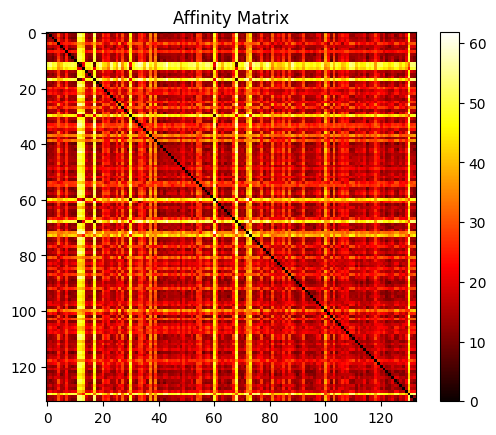

In [ ]:
#Visualización de matriz de similitud
#Esto puede proporcionar información sobre las relaciones de similitud entre las muestras
plt.imshow(affinity_matrix_euclidean, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Affinity Matrix')
plt.show()

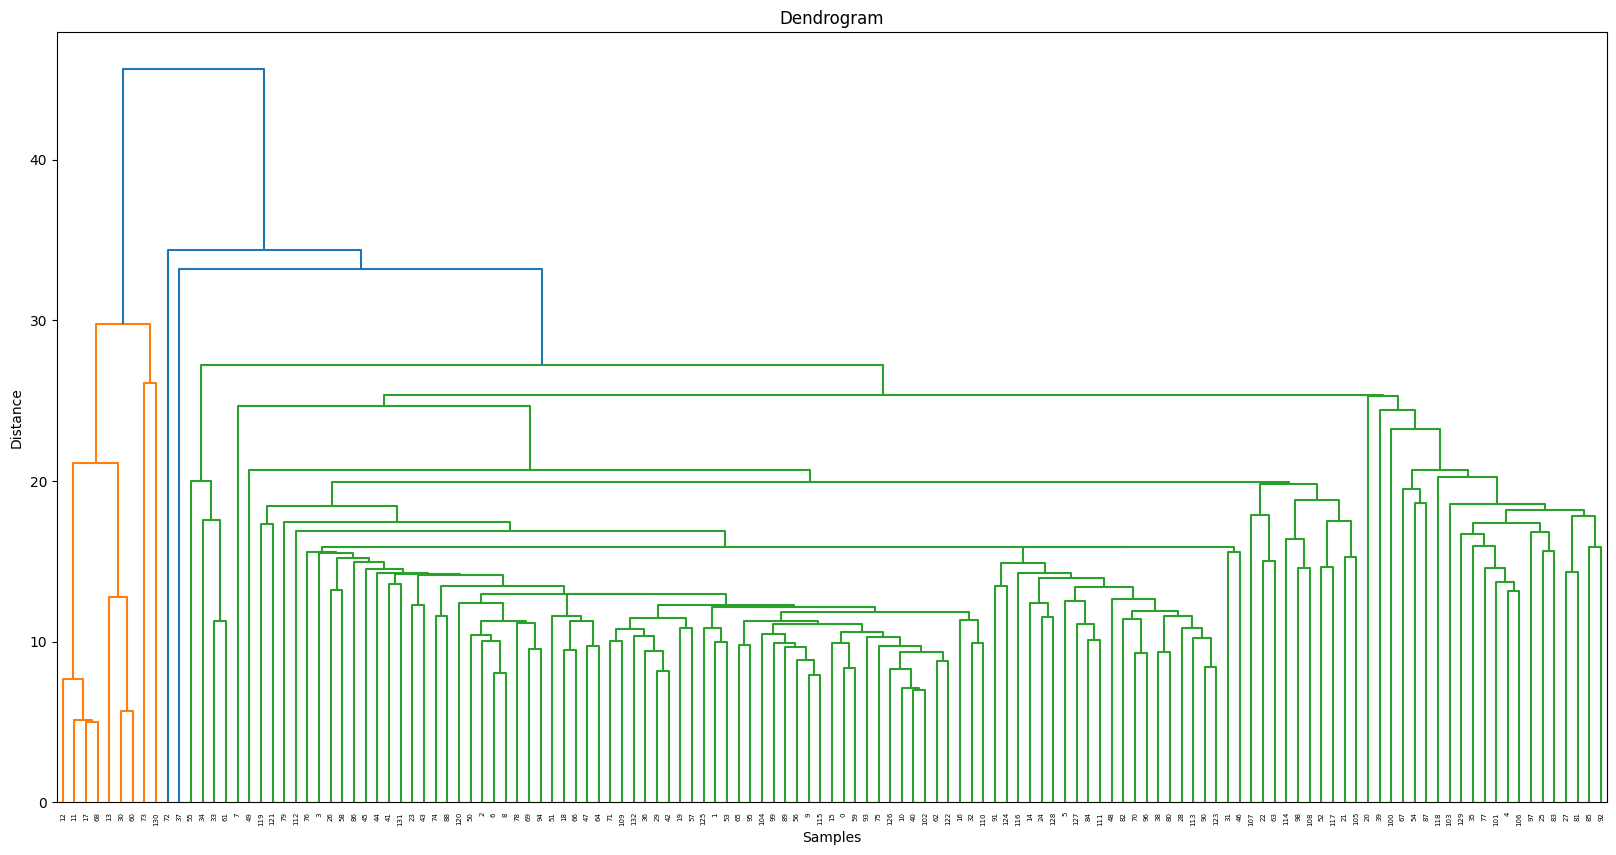

In [ ]:
#Visualización de gráfico de dendrograma

# Calcular la matriz de enlace jerárquico
Z = linkage(X, method='average', metric='euclidean')

# Dibujar el dendrograma
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
#A.1) matriz de afinidad=distancia euclidiana y assign_labels=discretize

In [ ]:
#1.Clustering1: matriz de afinidad euclideana - discretize - n_clusters=4
n_clusters = 4    #número de clusters que se desea obtener
spectral_clustering1 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels1 = spectral_clustering1.fit_predict(affinity_matrix_euclidean)
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

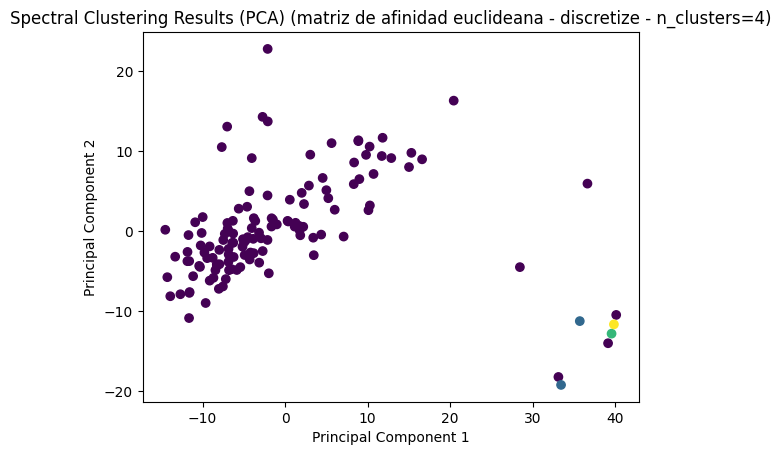

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels1)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

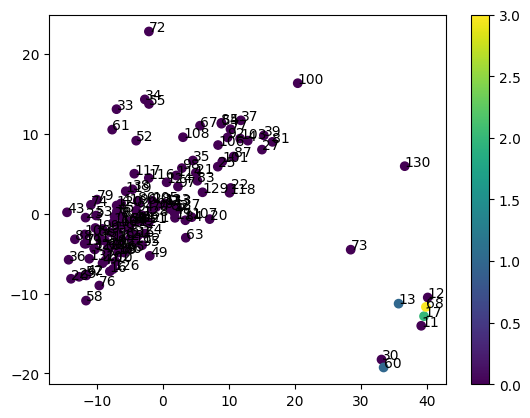

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels1):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering1.n_clusters):

    cluster_indices = np.where(labels1 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")




Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
- Atributo n. 2: V2 (Media: 4.170542635658915)
Cluster 2:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 7: SI0 (Media: 4.5)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 11: SP2 (Media: 3.0)
Cluster 3:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 13: SF1 (Media: 4.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 12: SP3 (Media: 3.0)
Cluster 4:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 4.0)
- Atributo n. 14: SF2 (Media: 4.0)


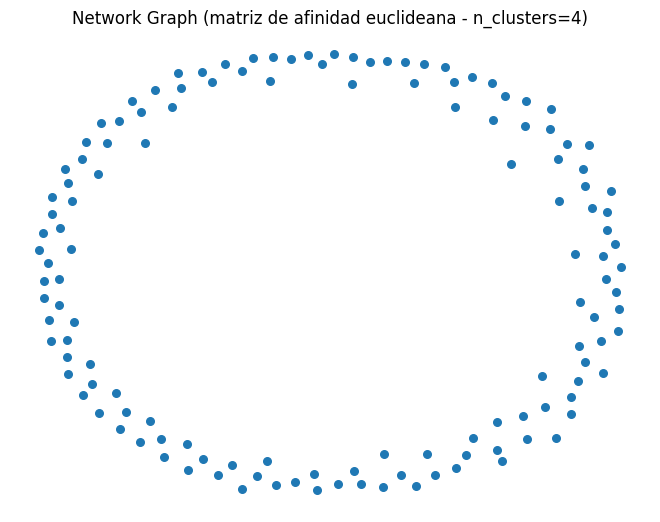

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 4   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=4)')
plt.show()


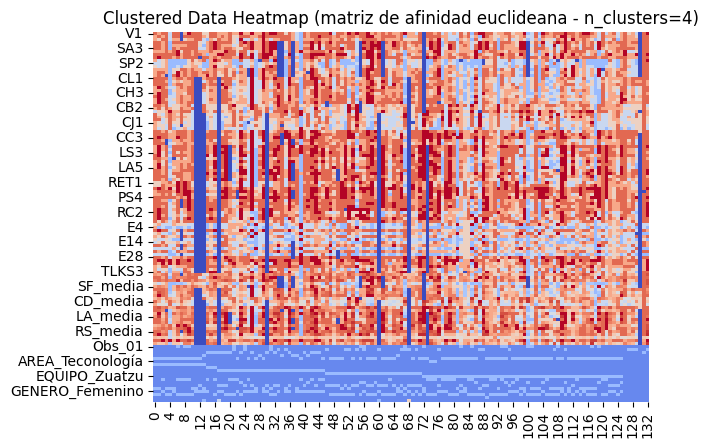

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels1

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=4)')
plt.show()


In [ ]:
#2.Clustering2:  matriz de afinidad euclideana - discretize - n_clusters=97
n_clusters = 97    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering2 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels2 = spectral_clustering2.fit_predict(affinity_matrix_euclidean)
labels2

array([49, 73, 65, 79, 93, 83, 74, 92, 32, 39, 44, 36, 51, 69, 86, 21, 58,
        4, 68, 57, 29, 30, 16, 92, 12, 30, 53, 11, 29, 77,  5, 59, 13, 64,
       40, 83, 47, 86, 60, 75, 20, 33, 24, 23,  9, 28, 46,  1, 27, 84, 82,
       81, 54, 70, 27,  1,  7, 26,  0, 35, 43, 10,  6, 61, 19, 50, 63,  3,
       22, 17,  9, 31, 40, 40, 79, 14, 70,  8, 66, 33,  2, 41, 88,  3, 33,
       16, 71, 86, 53, 71, 25,  1, 75, 34,  8, 73, 62, 18, 19, 61, 84, 45,
       37, 74, 42, 11, 28, 30, 67, 55, 56, 46, 54, 35, 86, 52, 18, 67, 86,
       83, 59, 87, 53, 48, 73, 78, 15, 41, 38, 75, 18, 72, 91])

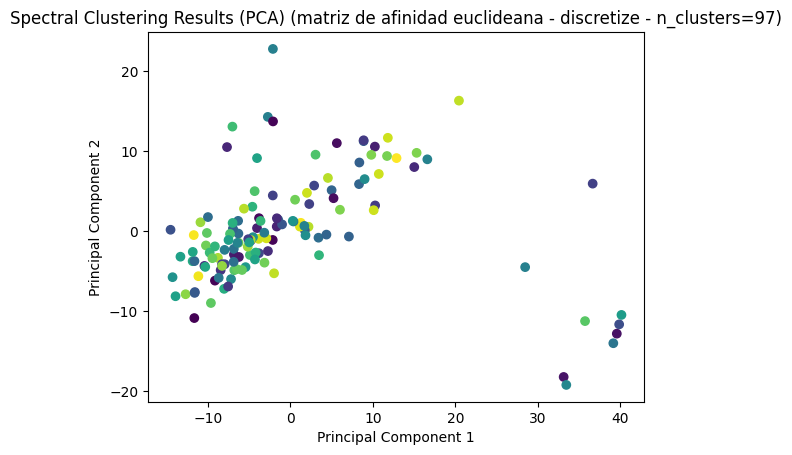

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels2)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

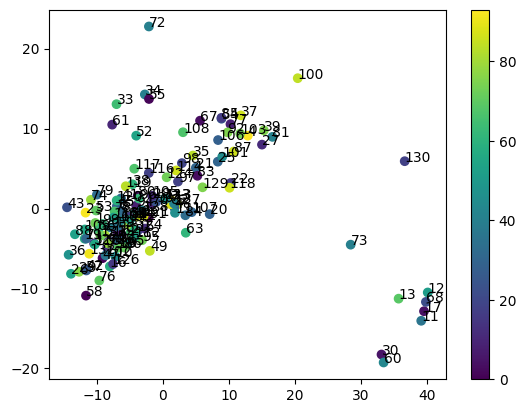

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels2):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

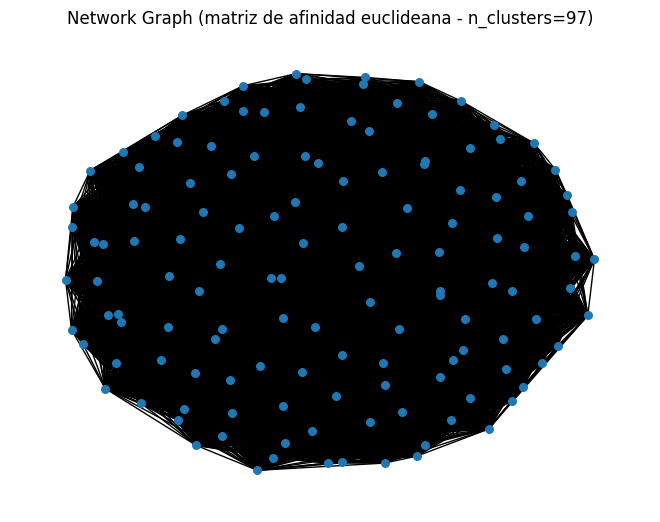

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

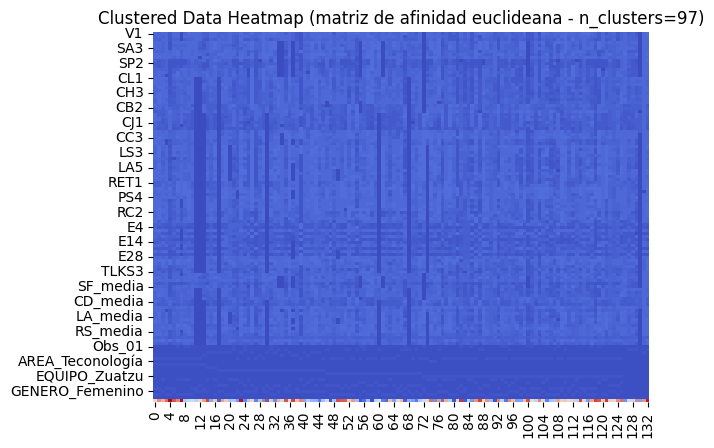

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels2

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#3.Clustering3:  matriz de afinidad euclideana - discretize - n_clusters=27
n_clusters = 27    #número de clusters que se desea obtener; porque son 27 áreas
spectral_clustering3 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels3 = spectral_clustering3.fit_predict(affinity_matrix_euclidean)
labels3

array([14, 13, 12,  6,  2, 15,  8,  2, 18, 19, 20, 17, 21,  2, 18, 24, 14,
       10, 13,  2,  2,  2, 15,  0,  2,  9, 16,  2, 15,  3,  7,  9,  6,  8,
        2,  9, 22,  2,  0,  2,  0,  5, 26, 16, 15,  9, 15, 18, 12,  2,  9,
        9, 12, 25,  2,  2, 20, 11,  0, 13, 19,  1,  8,  2, 11,  3, 23,  2,
        4, 13, 23,  0,  2,  2, 13, 12,  2,  1,  3,  2, 15,  9, 15, 24,  9,
        2,  2,  2,  9,  9, 15, 24,  2, 24, 23, 13,  6,  2,  9, 13,  9, 13,
       25,  2,  9, 22,  9,  1,  2, 12, 15,  2,  1, 13,  2,  5,  8,  2,  2,
       12,  2,  9,  2,  1, 15, 14, 16,  2, 12,  2,  1, 20,  1])

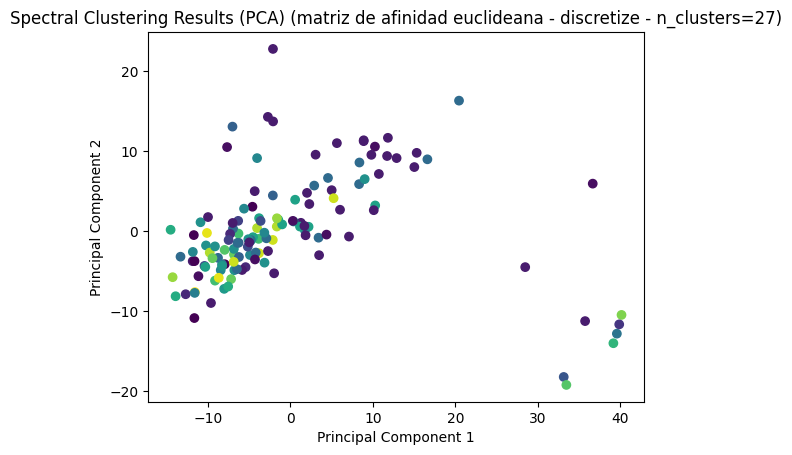

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels3)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels3)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

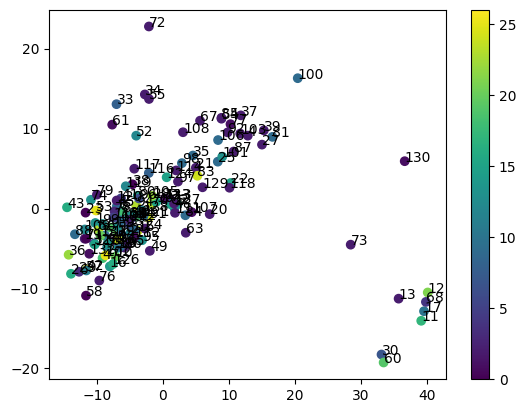

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels3):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

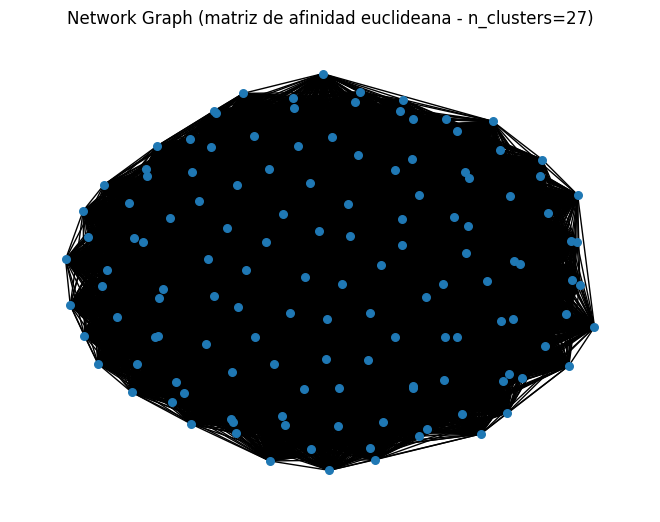

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=27)')
plt.show()

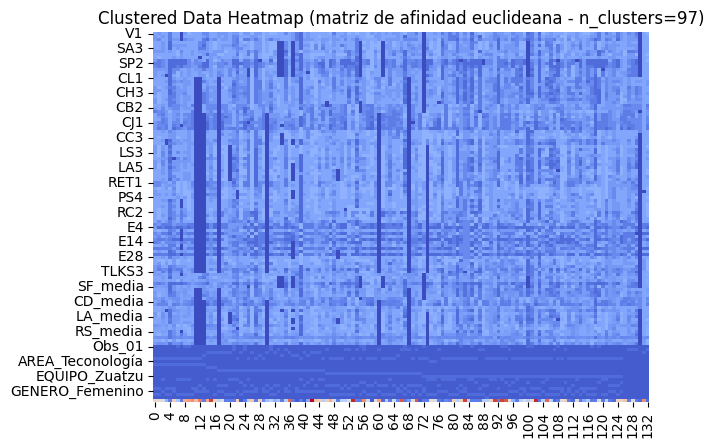

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels3

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#A.2)  matriz de afinidad=distancia euclidiana y assign_labels=kmeans

In [ ]:
#4.Clustering4:  matriz de afinidad euclideana - kmeans - n_clusters=4
n_clusters = 4    #número de clusters que se desea obtener
spectral_clustering4 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels4 = spectral_clustering4.fit_predict(affinity_matrix_euclidean)
labels4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

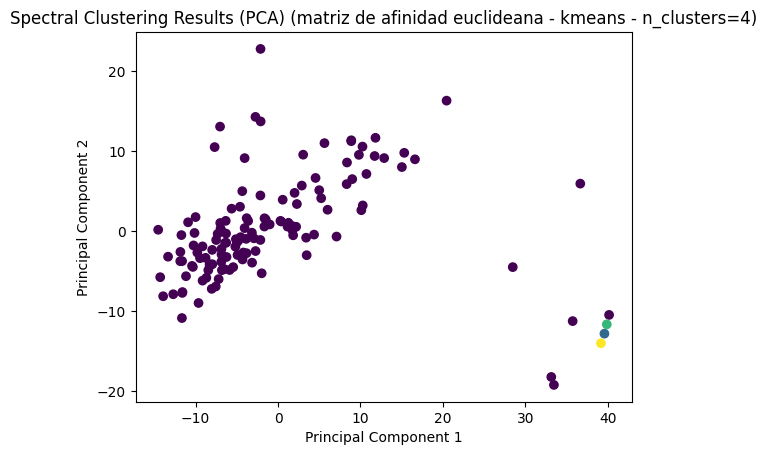

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels4)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels4)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

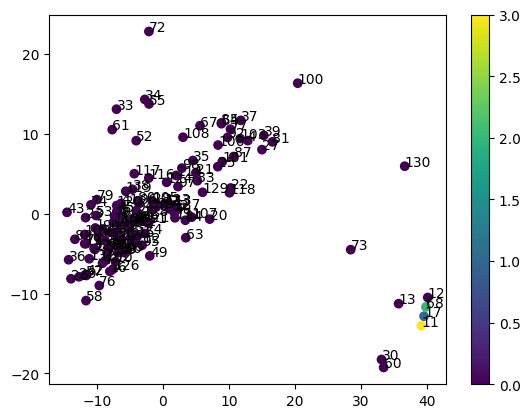

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels4):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

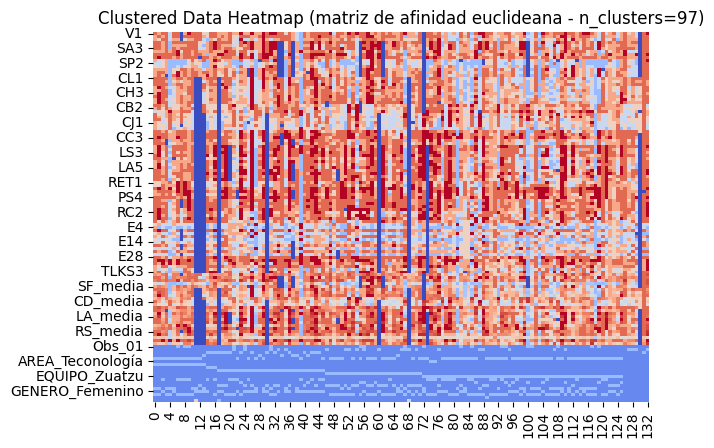

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels4

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#5.Clustering5:  matriz de afinidad euclideana - kmeans - n_clusters=97
n_clusters = 97    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering5 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels5 = spectral_clustering5.fit_predict(affinity_matrix_euclidean)
labels5

array([ 8, 61,  5, 53, 47, 35, 18,  6, 45, 15, 24, 53, 53, 53, 38, 21, 33,
        1, 57, 66, 53, 36, 53, 94, 71, 88, 80, 53, 65, 40, 53, 12, 54, 53,
       53, 53, 42,  7, 62, 12, 17, 82, 27, 92, 89, 90,  6, 59, 81, 12, 39,
       69, 86, 50, 53,  6, 52, 76, 55, 23, 53, 12, 25, 96, 75, 28, 67,  6,
       53, 63, 20, 22, 53, 53, 58,  4, 53, 53, 30, 64,  3, 53, 77, 70, 44,
       93, 95,  7, 73, 41, 11, 78, 12, 31,  0, 48,  9, 83, 85, 46,  6, 74,
       13, 53, 10, 53, 84,  6,  6, 49, 87, 72,  6, 34,  2, 26, 91, 68, 12,
        6, 43, 60, 19, 14, 51, 16, 32, 79, 29, 53, 53, 56, 37],
      dtype=int32)

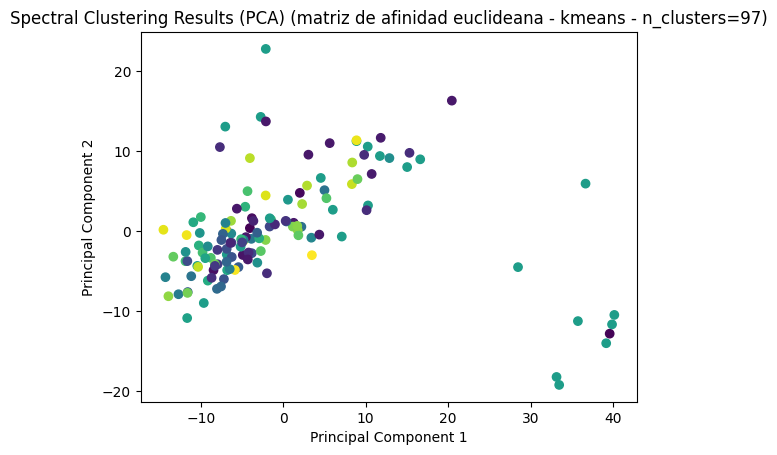

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels5)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

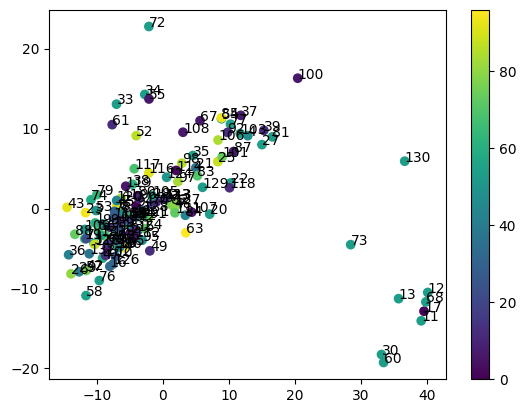

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels5):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

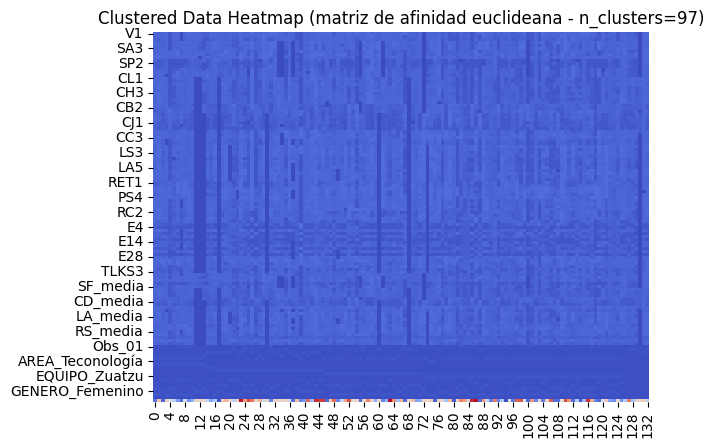

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels5

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#6.Clustering6: matriz de afinidad euclideana - kmeans - n_clusters=27
n_clusters = 27    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering6 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels6 = spectral_clustering6.fit_predict(affinity_matrix_euclidean)
labels6

array([ 4,  6,  0,  0,  0,  0, 14,  0,  6,  8, 10,  0,  0, 22,  0, 26,  6,
        7, 21, 26,  0, 26,  0,  0, 26,  0,  0,  0,  6, 15,  0,  0, 26,  6,
        0,  0,  1,  0,  0,  0,  9,  0, 16,  0,  0,  0,  0, 26,  0,  0,  0,
        0,  0, 24,  0,  0,  0, 19,  0, 21,  0, 20, 18, 26,  0, 23,  6,  0,
        0, 21,  0, 11,  0,  0,  0, 25,  0,  0, 23,  0,  6,  0,  6,  0,  6,
        0,  0,  0,  6,  0,  6,  0,  0, 12,  0, 21, 26,  0,  0,  0,  0,  0,
        3,  0,  6,  0,  0,  0,  0,  0,  6, 26,  0,  0,  0,  2,  0,  0,  0,
        0, 26,  0, 17,  5,  6, 26, 13, 26,  0,  0,  0,  0,  0],
      dtype=int32)

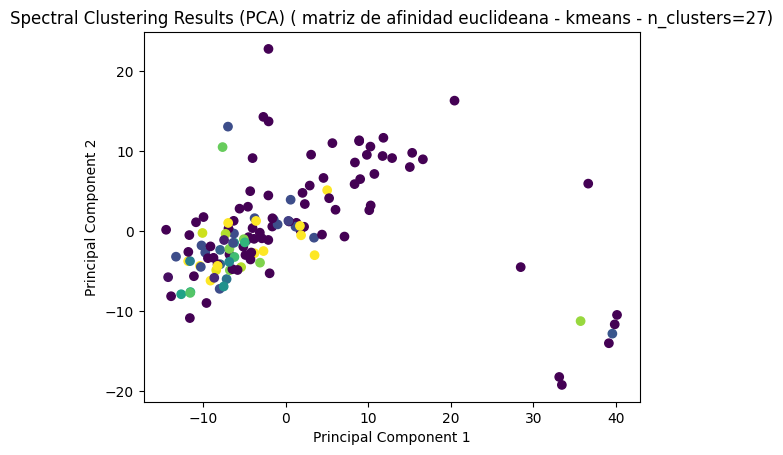

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels6)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results ( matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels6)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) ( matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

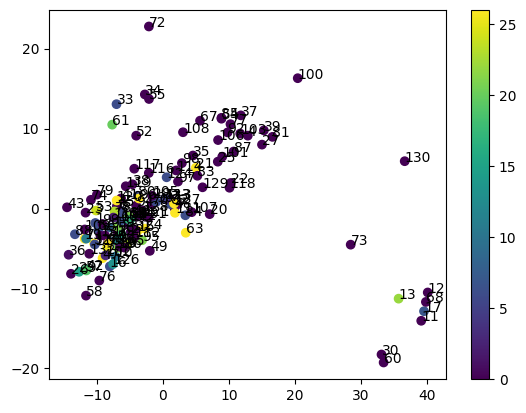

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels6)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels6):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

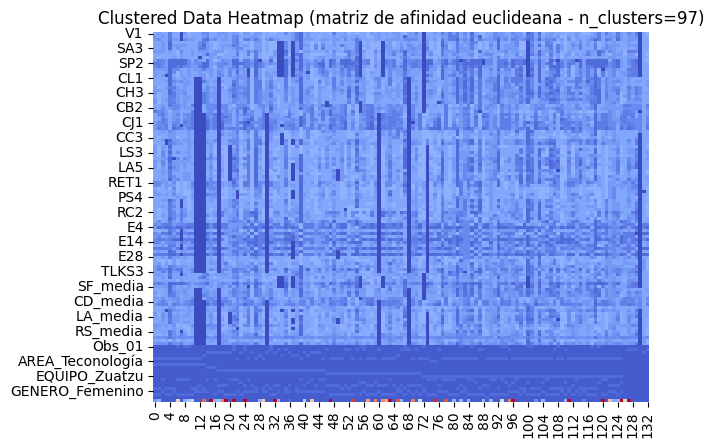

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels6

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
# B) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando RBF
affinity_matrix_rbf = rbf_kernel(X, gamma=0.1)

In [ ]:
# B.1)  matriz de afinidad=RBF y assign_labels=discretize

In [ ]:
#7.Clustering7: matriz de afinidad RBF - discretize - n_clusters=4
n_clusters = 4
spectral_clustering7 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_7 = spectral_clustering7.fit_predict(affinity_matrix_rbf)
labelsRBF_7

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0])

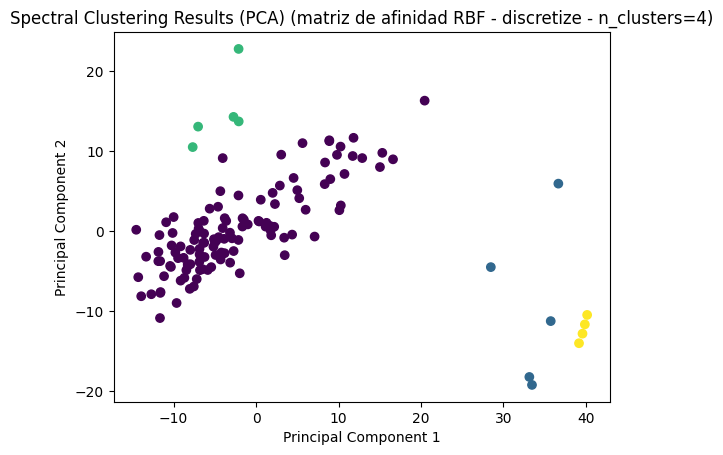

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_7)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - discretize - n_clusters=4)')
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels    plt.show()

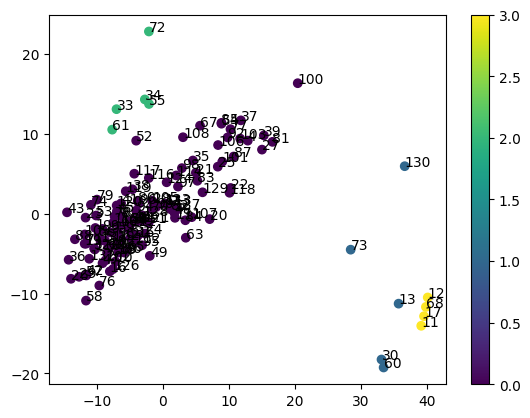

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_7)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_7):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

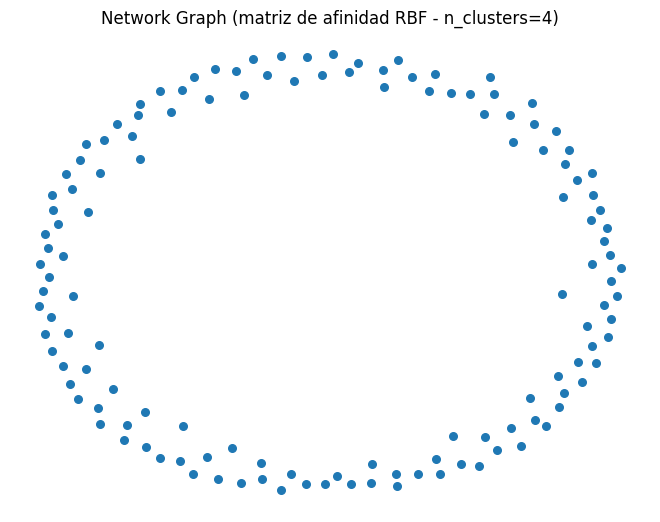

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 4

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=4)')
plt.show()


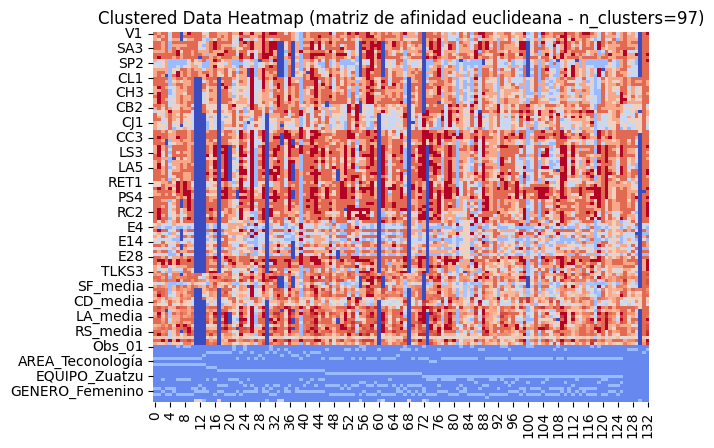

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_7

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#8.Clustering8: matriz de afinidad RBF - discretize - n_clusters=97
n_clusters = 97
spectral_clustering8 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_8 = spectral_clustering8.fit_predict(affinity_matrix_rbf)
labelsRBF_8

array([ 1, 11, 33, 17, 14,  0, 33, 23, 33, 17,  0, 47,  2, 20, 28,  1,  8,
       47,  0,  0, 18, 37,  0, 27, 28, 14, 50, 14,  0,  0, 20, 28,  8, 56,
       56, 15,  0,  3,  9, 19,  0,  1,  0, 21,  1,  0, 17, 16,  0, 17, 33,
       16, 15, 11,  7, 56, 17,  0,  0,  1, 20, 56,  0, 87, 16, 84, 11, 25,
       47, 65, 37,  0,  5, 13, 11,  0,  0, 34, 34,  9,  9, 14,  0, 87, 87,
        7, 16,  6, 40, 17,  0, 84,  6,  0, 65, 84, 37, 65, 10, 17, 29, 34,
        0, 34, 17,  0, 14, 87, 10, 40,  8, 87,  8,  0, 87, 17, 15, 15, 12,
       28, 65, 65,  0,  0, 37, 11,  0, 87,  0, 37,  4, 17,  0])

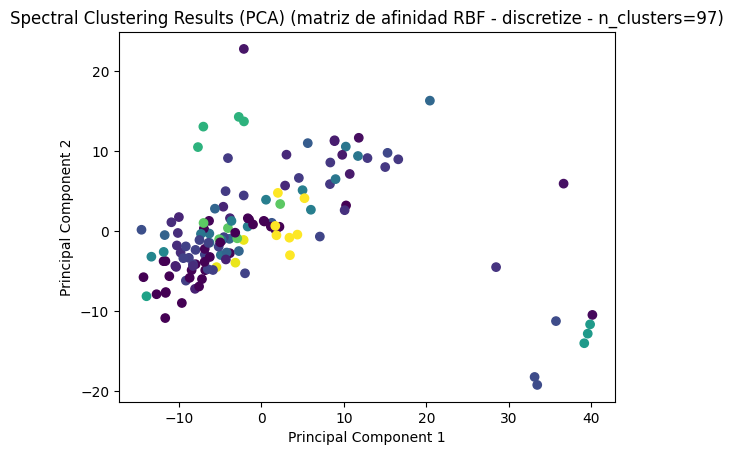

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results ( matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

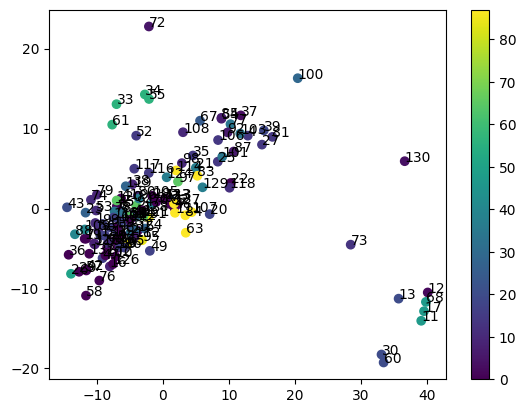

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_8)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_8):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

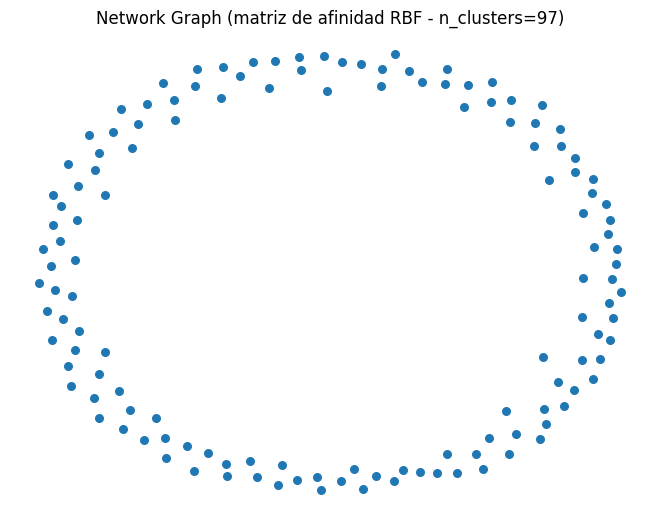

In [ ]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=97)')
plt.show()

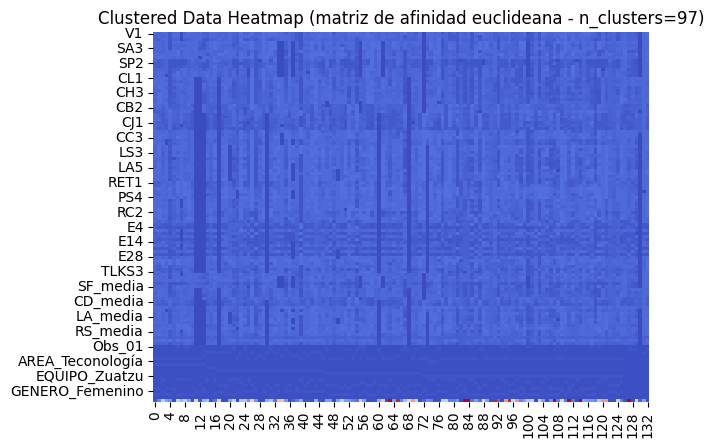

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_8

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#9.Clustering9: matriz de afinidad RBF - discretize - n_clusters=27
n_clusters = 27
spectral_clustering9 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_9 = spectral_clustering9.fit_predict(affinity_matrix_rbf)
labelsRBF_9

array([ 1,  5, 17, 17,  7,  0, 13, 10, 13, 17,  0, 14, 14,  2, 15,  1,  8,
       14,  0,  0, 13, 21,  0,  8, 15,  7, 23,  7,  0,  0,  2, 15,  8,  9,
        9, 11,  0,  0,  6,  4,  0,  1,  0,  5,  1,  1,  1, 12,  0, 17, 13,
       12, 11,  5,  7,  9, 17,  0,  0,  1,  2,  9,  0, 13, 12,  0,  5, 11,
       14, 10, 21,  0,  9,  2,  5,  0,  0,  4,  4,  6,  6,  7,  0, 13, 13,
        4, 12, 21, 23, 17,  0,  1,  7, 12, 10,  1, 21, 10,  3, 17,  7,  4,
        0,  4, 17,  0,  7, 13,  3,  0,  8, 13,  8,  0, 13, 17, 11, 11, 13,
       15, 10, 10,  1,  0, 21,  5,  0, 13,  1, 21,  2, 17,  0])

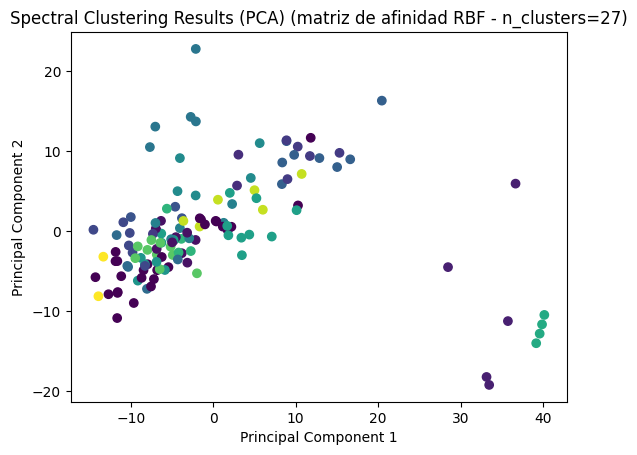

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_9)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results ( matriz de afinidad RBF - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_9)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_9)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - n_clusters=27)')
    plt.show()

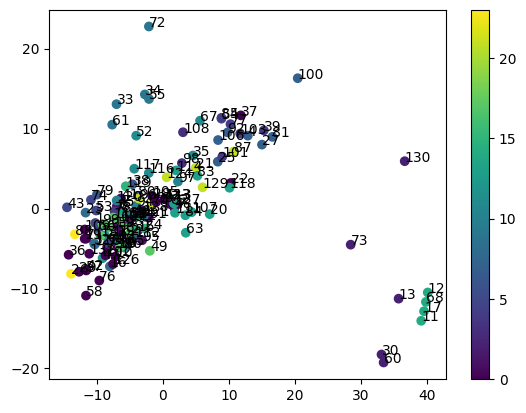

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_9)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_9):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

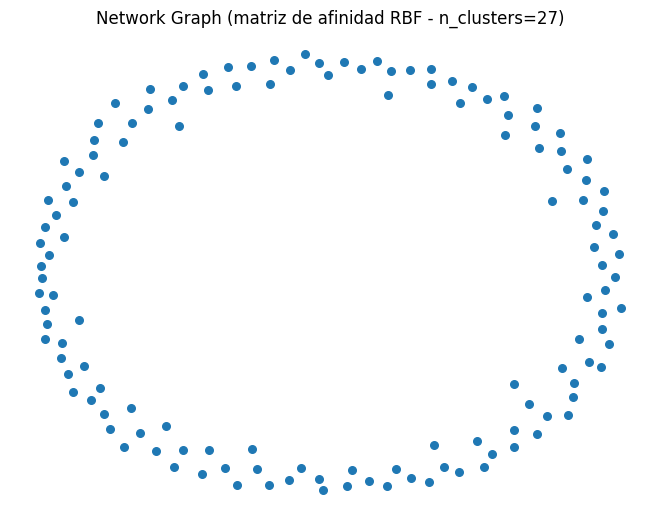

In [ ]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 27

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=27)')
plt.show()

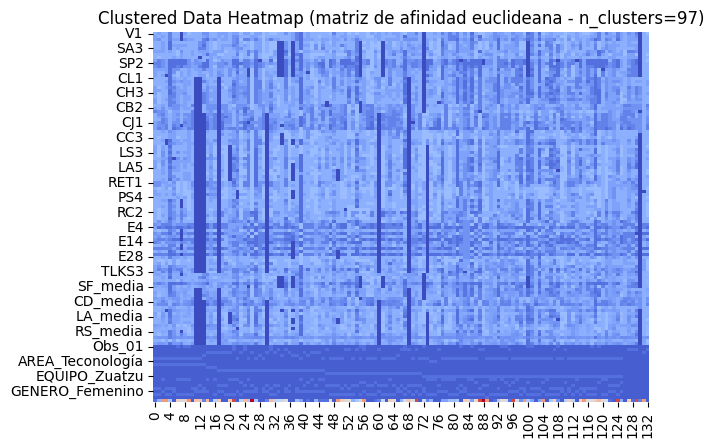

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_9

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
# B.2)  matriz de afinidad=RBF y assign_labels=kmeans

In [ ]:
#10.Clustering10: matriz de afinidad RBF - kmeans - n_clusters=4
n_clusters = 4
spectral_clustering10 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_10 = spectral_clustering10.fit_predict(affinity_matrix_rbf)
labelsRBF_10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0], dtype=int32)

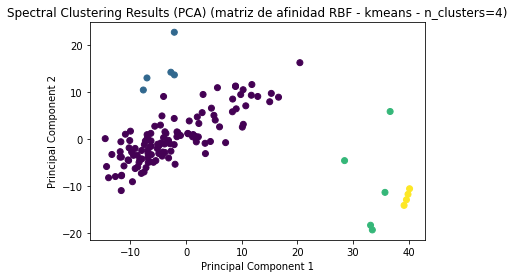

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_10)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_10)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

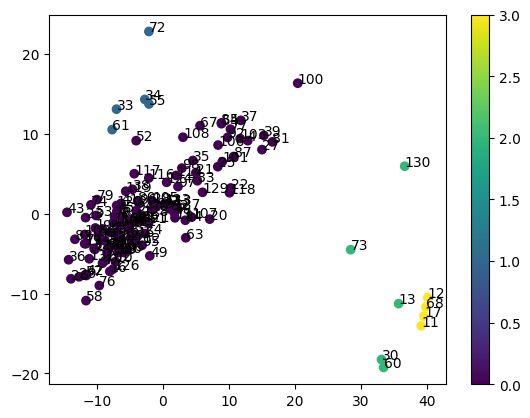

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_10)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_10):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

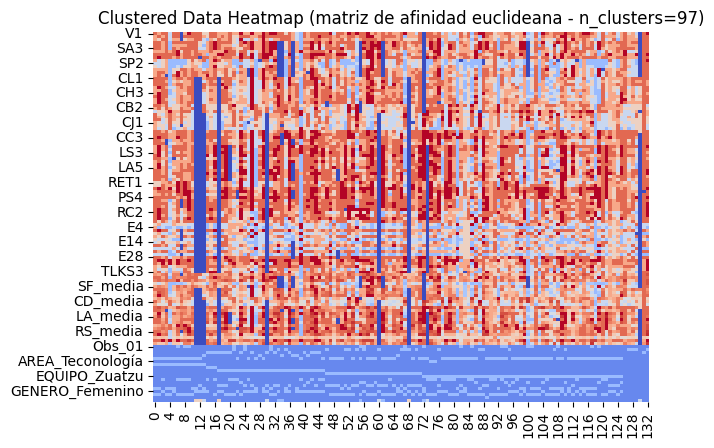

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_10

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#11.Clustering11: matriz de afinidad RBF - kmeans - n_clusters=97
n_clusters = 97
spectral_clustering11 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_11 = spectral_clustering11.fit_predict(affinity_matrix_rbf)
labelsRBF_11

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (53) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  est = KMeans(


array([60, 60, 60, 25, 26, 31, 60,  8, 60, 60, 60, 60, 60, 60, 55, 60, 60,
       60, 60, 60,  6, 47, 29, 57, 60, 24, 60, 43, 60, 60, 60, 25, 60, 60,
       12, 65, 60,  3, 60,  5, 60, 71, 60, 60, 60, 40, 71, 60,  0, 15, 60,
       55, 20, 60, 14,  7, 60, 60, 56, 60, 60, 60, 60, 40, 60, 60, 60, 13,
       60, 60, 60, 60,  4,  2, 60, 60, 30, 27, 60, 32, 60, 78,  0, 36, 60,
       18, 71, 10, 60, 60, 60, 40, 28, 60, 60, 60, 60, 22, 21, 60,  9, 46,
       60, 17, 60, 33, 50, 51, 52, 60, 60, 55, 49, 55, 19, 60, 40, 44, 11,
       16, 40, 35, 60, 60, 55, 60, 60, 55, 60, 37,  1, 60, 23],
      dtype=int32)

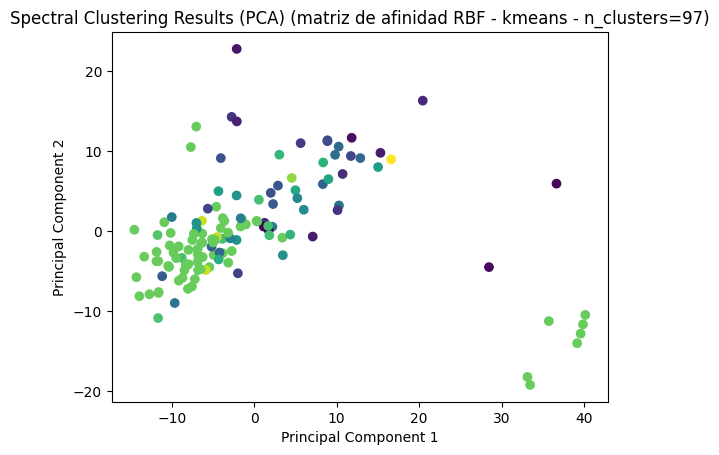

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_11)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_11)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_11)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

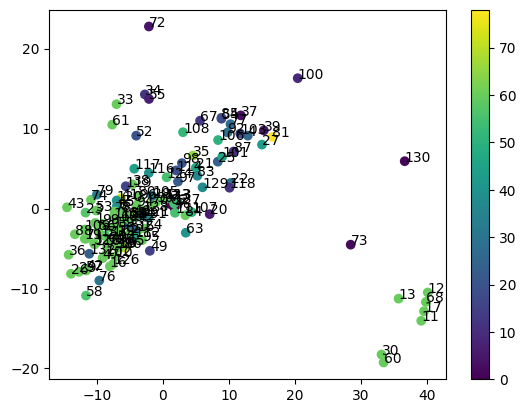

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_11)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_11):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

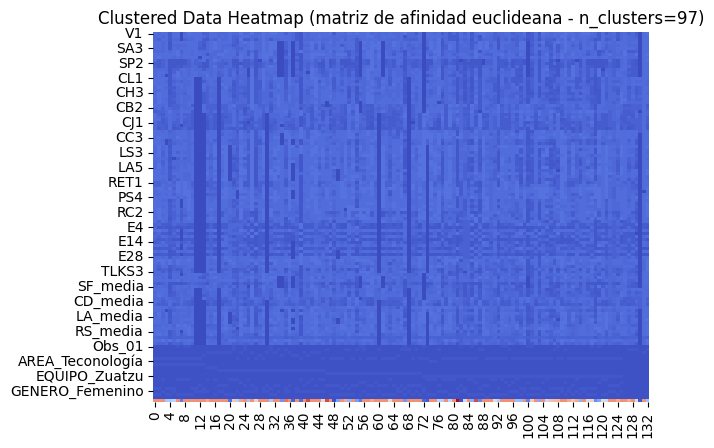

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_11

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#12.Clustering12: matriz de afinidad RBF - kmeans - n_clusters=27
n_clusters = 27
spectral_clustering12 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_12 = spectral_clustering12.fit_predict(affinity_matrix_rbf)
labelsRBF_12

array([ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0, 23,  0,  0,
        0,  0,  0, 11,  0, 26,  0,  0, 16,  0,  1,  0,  0,  0, 23,  0, 24,
       24, 20,  0, 25,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 17,  0, 19, 24,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0, 12,
        0,  0,  0,  0, 24,  0,  0,  0,  0,  4,  0,  0,  0, 15,  0,  0,  0,
        8,  0, 22,  0,  0,  0,  0,  6,  0,  0,  0,  0, 13,  5,  0,  9, 21,
        0,  7,  0,  0, 10,  0,  2,  0,  0,  0,  0,  0, 18,  0,  0,  0, 14,
       23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

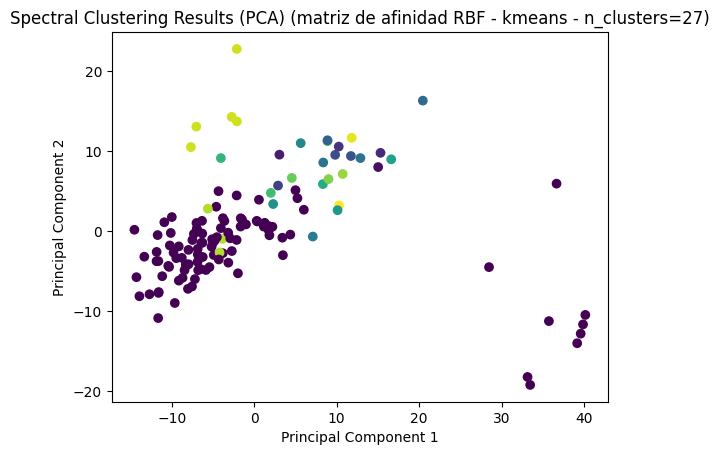

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_12)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_12)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

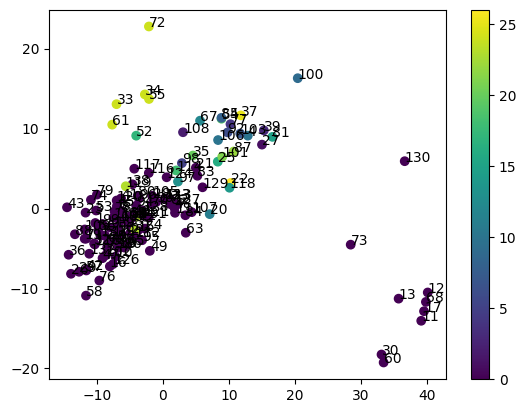

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_12)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_12):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

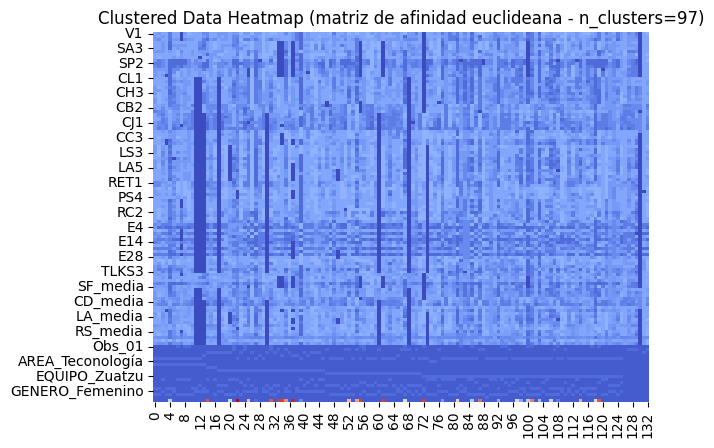

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_12

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#13.Clustering13: matriz de afinidad RBF - kmeans - n_clusters=97 random_state=2
n_clusters = 97
spectral_clustering13 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=2)
labelsRBF_13 = spectral_clustering13.fit_predict(affinity_matrix_rbf)
labelsRBF_13

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (58) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  est = KMeans(


array([76, 76, 76, 61, 95, 55, 76,  8, 76, 76, 76, 76, 76, 76, 44, 76, 76,
       76, 76, 73,  6, 43, 23, 44, 76, 18, 67, 58, 76, 76, 76, 20, 76, 76,
       12, 26, 76,  3, 76,  5, 76,  1, 76, 34, 38, 55, 34, 76, 37, 15, 76,
       44, 22, 76, 14,  7, 76, 76, 79, 76, 76, 76, 76, 68, 76, 76, 76, 13,
       76, 76, 76, 76,  4,  2, 70, 76, 39, 81, 76, 27, 76, 50, 60, 49, 76,
       17, 85, 10, 76, 76, 76, 38, 28, 76, 76, 76, 76, 51, 31, 76,  9, 64,
       76, 19, 76, 36, 59, 90, 25, 55, 76, 55, 53, 76, 21, 76, 79, 76, 11,
       16, 34, 52, 76, 76, 60, 76, 76, 55, 70, 47,  0, 52, 55],
      dtype=int32)

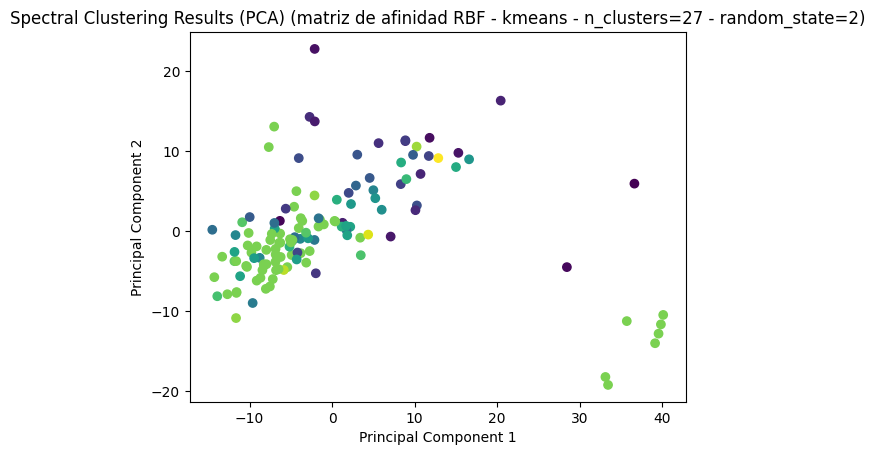

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_13)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_13)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_13)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

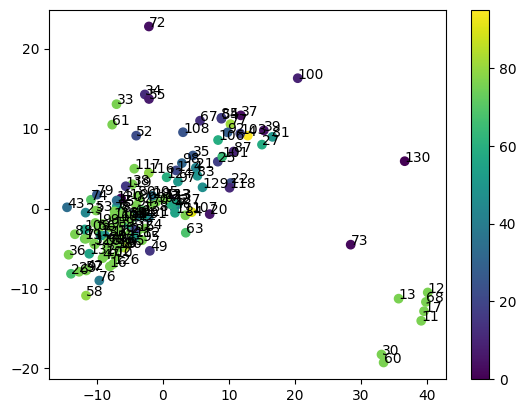

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_13)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_13):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

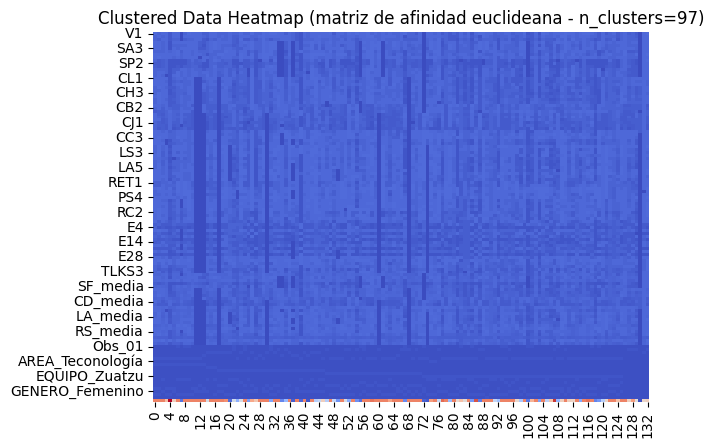

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_13

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

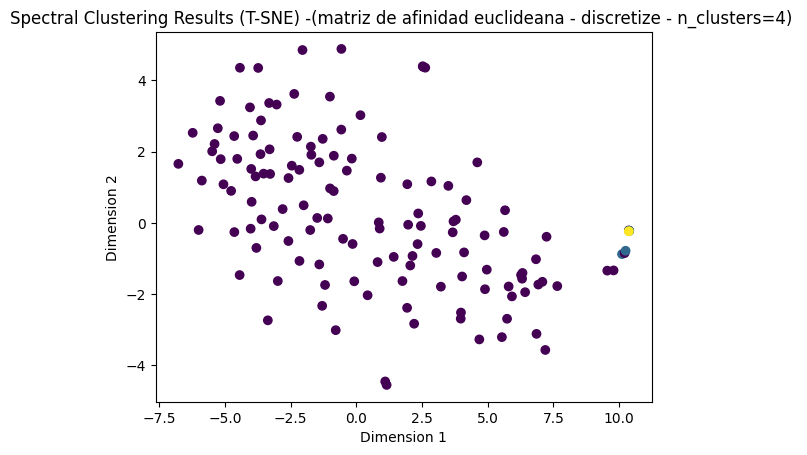

In [ ]:
#T-SNE (t-Distributed Stochastic Neighbor Embedding)

# Reducción de dimensionalidad con T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualización en un gráfico de dispersión
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Spectral Clustering Results (T-SNE) -(matriz de afinidad euclideana - discretize - n_clusters=4) ')
plt.show()


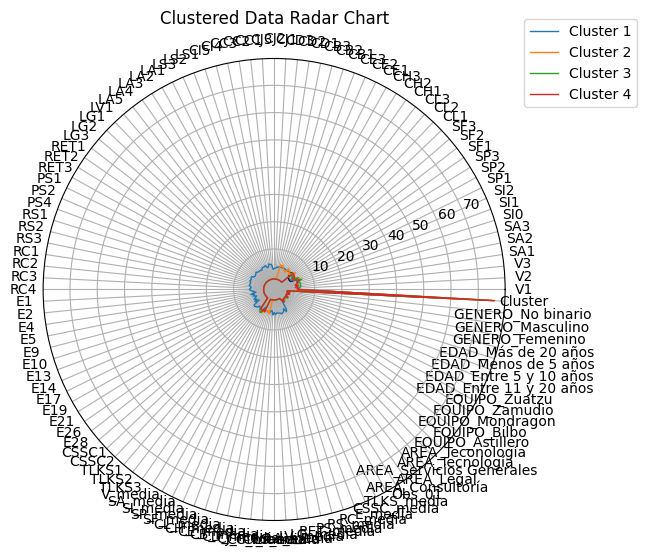

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels1).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()


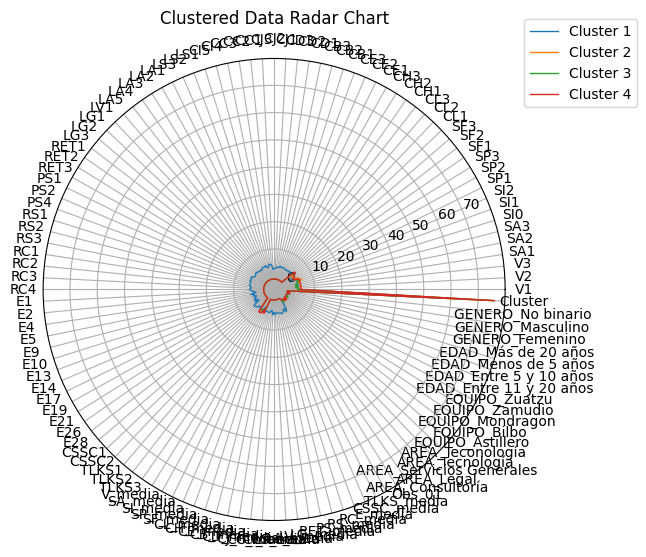

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels4).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()

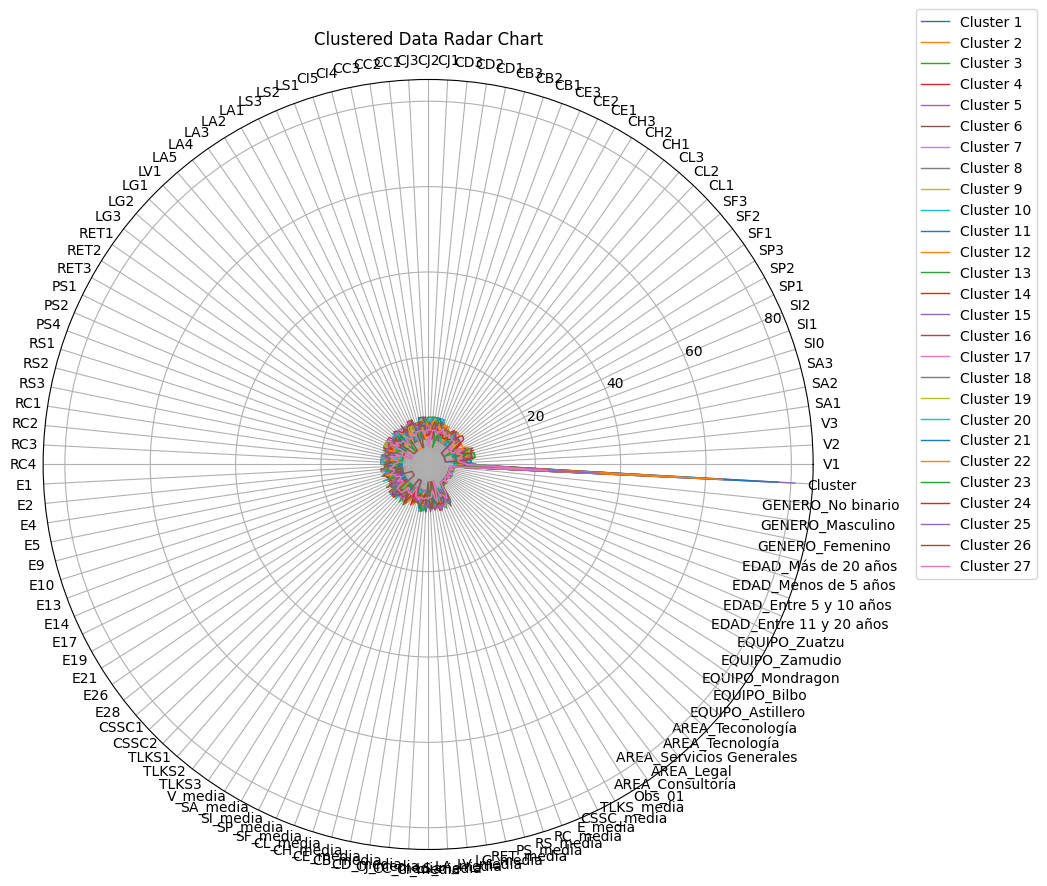

In [ ]:
#Gráfico de radar: Si tus datos tienen características numéricas, puedes utilizar un gráfico de radar para visualizar las
#características promedio de cada clúster. Cada clúster se representa como un polígono y la posición de los vértices del
#polígono corresponde a los valores promedio de las características en ese clúster


# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labelsRBF_12).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()